xcrun: error: invalid active developer path (/Library/Developer/CommandLineTools), missing xcrun at: /Library/Developer/CommandLineTools/usr/bin/xcrun
xcrun: error: invalid active developer path (/Library/Developer/CommandLineTools), missing xcrun at: /Library/Developer/CommandLineTools/usr/bin/xcrun
xcrun: error: invalid active developer path (/Library/Developer/CommandLineTools), missing xcrun at: /Library/Developer/CommandLineTools/usr/bin/xcrun


In [41]:
#Viewing Options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 308)
pd.set_option('display.width', None)

In [2]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Statistical Modeling and Machine Learning
from sklearn import model_selection, metrics, linear_model, ensemble
import statsmodels.api as sm
from scipy import stats
#excel files
import openpyxl




In [3]:
fangraphs_data = pd.read_csv("fangraphs_season_level.csv")
savant_data = pd.read_csv("savant_pitch_level.csv")

In [4]:
OG_fangraphs = fangraphs_data
OG_savant = savant_data

In [5]:
fangraphs_data.head()

,PlayerId,MLBAMID,Name,NameASCII,Throws,Season,Age,Team,Role,G,...,Pit_plus_FC,Stf_plus_FS,Loc_plus_FS,Pit_plus_FS,Stf_plus_FO,Loc_plus_FO,Pit_plus_FO,Stuff_plus,Location_plus,Pitching_plus
0,18,491703,NeftalÃ­ Feliz,Neftali Feliz,R,2021,33,- - -,RP,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.316418,95.123881,95.873134
1,1157,488984,Tommy Hunter,Tommy Hunter,R,2021,34,NYM,RP,3,...,103.100000,NaN,NaN,NaN,NaN,NaN,NaN,86.285556,94.884444,95.112222
2,1159,461865,Andrew Romine,Andrew Romine,R,2021,35,CHC,RP,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.925000,108.425000,99.200000
3,1246,456713,Matt Bush,Matt Bush,R,2021,35,TEX,RP,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.852174,98.340580,102.611594
4,1247,493603,Adam Ottavino,Adam Ottavino,R,2021,35,BOS,RP,69,...,66.583333,NaN,NaN,NaN,NaN,NaN,NaN,116.269527,94.625394,102.238617


In [6]:
print(fangraphs_data.columns)

Index(['PlayerId', 'MLBAMID', 'Name', 'NameASCII', 'Throws', 'Season', 'Age',
       'Team', 'Role', 'G',
       ...
       'Pit_plus_FC', 'Stf_plus_FS', 'Loc_plus_FS', 'Pit_plus_FS',
       'Stf_plus_FO', 'Loc_plus_FO', 'Pit_plus_FO', 'Stuff_plus',
       'Location_plus', 'Pitching_plus'],
      dtype='object', length=308)


In [7]:
print(OG_fangraphs.columns)

Index(['PlayerId', 'MLBAMID', 'Name', 'NameASCII', 'Throws', 'Season', 'Age',
       'Team', 'Role', 'G',
       ...
       'Pit_plus_FC', 'Stf_plus_FS', 'Loc_plus_FS', 'Pit_plus_FS',
       'Stf_plus_FO', 'Loc_plus_FO', 'Pit_plus_FO', 'Stuff_plus',
       'Location_plus', 'Pitching_plus'],
      dtype='object', length=308)


In [8]:
fangraphs_columns = ['Name','PlayerId', 'Throws', 'Age', 'Team', 'Role', 'ERA', 'G', 'GS', 
                   'IP', 'SO', 'BB', 'SV', 'HLD', 'FIP', 'xFIP', 'SIERA', 'WHIP']

fangraphs_data = fangraphs_data[fangraphs_columns]

In [9]:
savant_data.columns
savant_columns = ['player_name', 'pitch_type', 'release_speed', 'release_spin_rate', 
                  'events', 'pfx_x', 'pfx_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 
                  'spin_axis', 'game_year']

savant_data = savant_data[savant_columns]

In [10]:
savant_data['player_name'] = savant_data['player_name'].str.split(', ').str[::-1].str.join(' ')
savant_data['player_name'] = savant_data['player_name'].astype(str)
fangraphs_data['Name'] = fangraphs_data['Name'].astype(str)


merged_data = pd.merge(savant_data, fangraphs_data, left_on='player_name', right_on='Name')


/tmp/ipykernel_63905/239398668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  savant_data['player_name'] = savant_data['player_name'].str.split(', ').str[::-1].str.join(' ')
/tmp/ipykernel_63905/239398668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  savant_data['player_name'] = savant_data['player_name'].astype(str)
/tmp/ipykernel_63905/239398668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [11]:
merged_data.head()

,player_name,pitch_type,release_speed,release_spin_rate,events,pfx_x,pfx_z,vx0,vy0,vz0,...,GS,IP,SO,BB,SV,HLD,FIP,xFIP,SIERA,WHIP
0,Danny Duffy,FF,93.2,2351.0,strikeout,0.43,1.57,-3.263176,-135.520600,-8.932598,...,0,1.0,1,0,0,0,1.170030,1.170030,-0.479878,0.000000
1,Danny Duffy,FF,93.2,2351.0,strikeout,0.43,1.57,-3.263176,-135.520600,-8.932598,...,12,60.0,64,22,0,0,3.436697,4.283335,4.179673,1.233333
2,Danny Duffy,SL,82.9,2408.0,NaN,-0.42,-0.34,-1.343797,-120.739091,-0.762147,...,0,1.0,1,0,0,0,1.170030,1.170030,-0.479878,0.000000
3,Danny Duffy,SL,82.9,2408.0,NaN,-0.42,-0.34,-1.343797,-120.739091,-0.762147,...,12,60.0,64,22,0,0,3.436697,4.283335,4.179673,1.233333
4,Danny Duffy,FF,93.6,2233.0,NaN,0.37,1.53,-6.325447,-136.141440,-4.315313,...,0,1.0,1,0,0,0,1.170030,1.170030,-0.479878,0.000000


In [27]:
OG_savant.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'zone', 'des', 'game_type', 'stand', 'p_throws',
       'home_team', 'away_team', 'type', 'hit_location', 'bb_type', 'balls',
       'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b',
       'on_2b', 'on_1b', 'outs_when_up', 'inning', 'inning_topbot', 'hc_x',
       'hc_y', 'fielder_2', 'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az',
       'sz_top', 'sz_bot', 'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension', 'game_pk',
       'pitcher_1', 'fielder_2_1', 'fielder_3', 'fielder_4', 'fielder_5',
       'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle',
       'woba_value', 'woba_denom', 'babip_value', 'iso_value',
       'launch_speed_angle', 'at_bat_

In [46]:
ogColumns = OG_fangraphs.columns
for i in c:
    print(i)

PlayerId
MLBAMID
Name
NameASCII
Throws
Season
Age
Team
Role
G
GS
IP
TBF
W
L
CG
ShO
SV
BS
HLD
SD
MD
Pulls
ERA
R
ER
H
HR
SO
BB
IBB
HBP
WP
BK
Events
GB
LD
FB
IFFB
BU
IFH
BUH
Balls
Strikes
Pitches
RS
RS_per_9
K_pct
BB_pct
K_minus_BB_pct
K_per_9
BB_per_9
K_to_BB
H_per_9
HR_per_9
AVG
WHIP
BABIP
LOB_pct
GB_pct
LD_pct
FB_pct
IFFB_pct
GB_to_FB
HR_to_FB
IFH_pct
BUH_pct
FIP
xFIP
SIERA
tERA
kwERA
E_minus_F
RAR
WAR
Dollars
WPA
RE24
REW
pLI
inLI
gmLI
exLI
WPA_to_LI
Clutch
OSwing_pct
ZSwing_pct
Swing_pct
OContact_pct
ZContact_pct
Contact_pct
Zone_pct
FStrike_pct
SwStr_pct
CStr_pct
CSW_pct
ERA_minus
FIP_minus
xFIP_minus
Pace
RA9_WAR
BIP_Wins
LOB_Wins
FDP_Wins
Pull_pct
Cent_pct
Oppo_pct
Soft_pct
Med_pct
Hard_pct
TTO_pct
FRM
K_pct_plus
BB_pct_plus
K_per_9_plus
BB_per_9_plus
K_to_BB_plus
H_per_9_plus
HR_per_9_plus
AVG_plus
WHIP_plus
BABIP_plus
LOB_pct_plus
GB_pct_plus
LD_pct_plus
FB_pct_plus
HR_to_FB_pct_plus
Pull_pct_plus
Cent_pct_plus
Oppo_pct_plus
Med_pct_plus
Hard_pct_plus
EV
LA
Barrels
Barrel_pct
ma

In [43]:
eventTypes = OG_savant['events'].unique()
eventTypes

array(['strikeout', nan, 'caught_stealing_3b', 'field_out', 'walk',
       'force_out', 'sac_fly', 'single', 'hit_by_pitch', 'double',
       'grounded_into_double_play', 'sac_bunt', 'home_run',
       'fielders_choice', 'field_error', 'other_out',
       'caught_stealing_2b', 'triple', 'strikeout_double_play',
       'fielders_choice_out', 'double_play', 'sac_fly_double_play',
       'catcher_interf', 'pickoff_caught_stealing_2b', 'pickoff_2b',
       'pickoff_caught_stealing_3b', 'triple_play', 'pickoff_1b',
       'sac_bunt_double_play', 'wild_pitch', 'game_advisory',
       'caught_stealing_home', 'pickoff_3b', 'stolen_base_2b',
       'passed_ball', 'pickoff_caught_stealing_home', 'pickoff_error_3b',
       'stolen_base_3b'], dtype=object)

In [50]:
OG_savant

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher_1,fielder_2_1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,role_key,sp_indicator,rp_indicator,pitch_number_appearance,pitcher_at_bat_number,times_faced
0,FF,2021-04-05,93.2,0.84,5.74,"Duffy, Danny",592696,518633,strikeout,swinging_strike,13.0,Eddie Rosario strikes out swinging.,R,L,L,CLE,KC,S,2.0,NaN,3,2,2021,0.43,1.57,-0.05,1.41,NaN,NaN,NaN,2,6,Bot,NaN,NaN,521692,NaN,-3.263176,-135.520600,-8.932598,5.954448,28.043049,-11.148223,3.41,1.56,NaN,NaN,NaN,94.6,2351.0,7.0,634616,518633,521692,467793,593160,593643,670032,643217,572191,624585,53.47,NaN,NaN,0.0,1.0,0.0,0.0,NaN,47,7,4-Seam Fastball,0,2,0,2,2,0,0,2,Infield shift,Standard,166.0,-0.014,-0.134,SP,1,0,97,22,3
1,SL,2021-04-05,82.9,1.03,5.69,"Duffy, Danny",592696,518633,NaN,foul,5.0,Eddie Rosario strikes out swinging.,R,L,L,CLE,KC,S,NaN,NaN,3,2,2021,-0.42,-0.34,0.09,2.24,NaN,NaN,NaN,2,6,Bot,NaN,NaN,521692,NaN,-1.343797,-120.739091,-0.762147,-3.829421,23.126347,-35.604081,3.41,1.56,180.0,65.7,27.0,83.9,2408.0,6.8,634616,518633,521692,467793,593160,593643,670032,643217,572191,624585,53.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,6,Slider,0,2,0,2,2,0,0,2,Infield shift,Standard,309.0,0.000,0.000,SP,1,0,96,22,3
2,FF,2021-04-05,94.6,-1.85,5.77,"Foltynewicz, Mike",543760,592314,caught_stealing_3b,ball,14.0,"Jonathan Davis caught stealing 3rd base, catch...",R,R,R,TEX,TOR,B,2.0,NaN,2,2,2021,-0.56,1.53,2.01,1.92,NaN,641505.0,NaN,2,4,Top,NaN,NaN,624431,NaN,11.292119,-137.173707,-7.760459,-9.543945,29.487286,-11.179944,3.26,1.45,NaN,NaN,NaN,94.5,2264.0,6.4,634612,592314,624431,663993,669256,518586,643396,621311,642201,608336,54.12,NaN,NaN,0.0,0.0,0.0,0.0,NaN,28,6,4-Seam Fastball,0,4,4,0,4,0,4,0,Standard,Standard,220.0,0.014,-0.202,SP,1,0,95,19,3
3,FF,2021-04-05,97.1,1.86,6.57,"Rodón, Carlos",657108,607074,field_out,hit_into_play,13.0,Evan White lines out to left fielder Andrew Va...,R,R,L,SEA,CWS,X,7.0,line_drive,3,2,2021,0.75,1.56,-0.84,2.21,NaN,NaN,664034.0,2,5,Bot,90.32,88.66,518735,NaN,-8.928735,-140.780154,-9.630044,12.067540,33.377164,-9.355497,3.49,1.60,288.0,81.5,26.0,96.8,2257.0,6.4,634551,607074,518735,547989,663611,660162,544725,683734,673357,571740,54.08,0.234,0.211,0.0,1.0,0.0,0.0,3.0,48,6,4-Seam Fastball,0,6,0,6,6,0,0,6,Standard,Standard,147.0,-0.007,-0.264,SP,1,0,95,22,3
4,FF,2021-04-05,93.6,0.60,5.85,"Duffy, Danny",592696,518633,NaN,ball,11.0,Eddie Rosario strikes out swinging.,R,L,L,CLE,KC,B,NaN,NaN,2,2,2021,0.37,1.53,-1.50,3.27,NaN,NaN,NaN,2,6,Bot,NaN,NaN,521692,NaN,-6.325447,-136.141440,-4.315313,6.067007,30.708701,-12.461123,3.21,1.56,NaN,NaN,NaN,94.8,2233.0,7.1,634616,518633,521692,467793,593160,593643,670032,643217,572191,624585,53.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,5,4-Seam Fastball,0,2,0,2,2,0,0,2,Infield shift,Standard,164.0,0.000,0.043,SP,1,0,95,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136332,SI,2023-05-2

In [54]:
OG_fangraphs.columns


Index(['PlayerId', 'MLBAMID', 'Name', 'NameASCII', 'Throws', 'Season', 'Age',
       'Team', 'Role', 'G',
       ...
       'Pit_plus_FC', 'Stf_plus_FS', 'Loc_plus_FS', 'Pit_plus_FS',
       'Stf_plus_FO', 'Loc_plus_FO', 'Pit_plus_FO', 'Stuff_plus',
       'Location_plus', 'Pitching_plus'],
      dtype='object', length=308)

In [56]:
for i in OG_fangraphs:
    print (i)

PlayerId
MLBAMID
Name
NameASCII
Throws
Season
Age
Team
Role
G
GS
IP
TBF
W
L
CG
ShO
SV
BS
HLD
SD
MD
Pulls
ERA
R
ER
H
HR
SO
BB
IBB
HBP
WP
BK
Events
GB
LD
FB
IFFB
BU
IFH
BUH
Balls
Strikes
Pitches
RS
RS_per_9
K_pct
BB_pct
K_minus_BB_pct
K_per_9
BB_per_9
K_to_BB
H_per_9
HR_per_9
AVG
WHIP
BABIP
LOB_pct
GB_pct
LD_pct
FB_pct
IFFB_pct
GB_to_FB
HR_to_FB
IFH_pct
BUH_pct
FIP
xFIP
SIERA
tERA
kwERA
E_minus_F
RAR
WAR
Dollars
WPA
RE24
REW
pLI
inLI
gmLI
exLI
WPA_to_LI
Clutch
OSwing_pct
ZSwing_pct
Swing_pct
OContact_pct
ZContact_pct
Contact_pct
Zone_pct
FStrike_pct
SwStr_pct
CStr_pct
CSW_pct
ERA_minus
FIP_minus
xFIP_minus
Pace
RA9_WAR
BIP_Wins
LOB_Wins
FDP_Wins
Pull_pct
Cent_pct
Oppo_pct
Soft_pct
Med_pct
Hard_pct
TTO_pct
FRM
K_pct_plus
BB_pct_plus
K_per_9_plus
BB_per_9_plus
K_to_BB_plus
H_per_9_plus
HR_per_9_plus
AVG_plus
WHIP_plus
BABIP_plus
LOB_pct_plus
GB_pct_plus
LD_pct_plus
FB_pct_plus
HR_to_FB_pct_plus
Pull_pct_plus
Cent_pct_plus
Oppo_pct_plus
Med_pct_plus
Hard_pct_plus
EV
LA
Barrels
Barrel_pct
ma

In [57]:
#pitch_number_appearance
# ^ Statistic for the pitch number for that appearance of the pitcher

In [69]:
OG_savant.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher_1,fielder_2_1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,role_key,sp_indicator,rp_indicator,pitch_number_appearance,pitcher_at_bat_number,times_faced
0,FF,2021-04-05,93.2,0.84,5.74,"Duffy, Danny",592696,518633,strikeout,swinging_strike,13.0,Eddie Rosario strikes out swinging.,R,L,L,CLE,KC,S,2.0,NaN,3,2,2021,0.43,1.57,-0.05,1.41,NaN,NaN,NaN,2,6,Bot,NaN,NaN,521692,NaN,-3.263176,-135.520600,-8.932598,5.954448,28.043049,-11.148223,3.41,1.56,NaN,NaN,NaN,94.6,2351.0,7.0,634616,518633,521692,467793,593160,593643,670032,643217,572191,624585,53.47,NaN,NaN,0.0,1.0,0.0,0.0,NaN,47,7,4-Seam Fastball,0,2,0,2,2,0,0,2,Infield shift,Standard,166.0,-0.014,-0.134,SP,1,0,97,22,3
1,SL,2021-04-05,82.9,1.03,5.69,"Duffy, Danny",592696,518633,NaN,foul,5.0,Eddie Rosario strikes out swinging.,R,L,L,CLE,KC,S,NaN,NaN,3,2,2021,-0.42,-0.34,0.09,2.24,NaN,NaN,NaN,2,6,Bot,NaN,NaN,521692,NaN,-1.343797,-120.739091,-0.762147,-3.829421,23.126347,-35.604081,3.41,1.56,180.0,65.7,27.0,83.9,2408.0,6.8,634616,518633,521692,467793,593160,593643,670032,643217,572191,624585,53.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,6,Slider,0,2,0,2,2,0,0,2,Infield shift,Standard,309.0,0.000,0.000,SP,1,0,96,22,3
2,FF,2021-04-05,94.6,-1.85,5.77,"Foltynewicz, Mike",543760,592314,caught_stealing_3b,ball,14.0,"Jonathan Davis caught stealing 3rd base, catch...",R,R,R,TEX,TOR,B,2.0,NaN,2,2,2021,-0.56,1.53,2.01,1.92,NaN,641505.0,NaN,2,4,Top,NaN,NaN,624431,NaN,11.292119,-137.173707,-7.760459,-9.543945,29.487286,-11.179944,3.26,1.45,NaN,NaN,NaN,94.5,2264.0,6.4,634612,592314,624431,663993,669256,518586,643396,621311,642201,608336,54.12,NaN,NaN,0.0,0.0,0.0,0.0,NaN,28,6,4-Seam Fastball,0,4,4,0,4,0,4,0,Standard,Standard,220.0,0.014,-0.202,SP,1,0,95,19,3
3,FF,2021-04-05,97.1,1.86,6.57,"Rodón, Carlos",657108,607074,field_out,hit_into_play,13.0,Evan White lines out to left fielder Andrew Va...,R,R,L,SEA,CWS,X,7.0,line_drive,3,2,2021,0.75,1.56,-0.84,2.21,NaN,NaN,664034.0,2,5,Bot,90.32,88.66,518735,NaN,-8.928735,-140.780154,-9.630044,12.067540,33.377164,-9.355497,3.49,1.60,288.0,81.5,26.0,96.8,2257.0,6.4,634551,607074,518735,547989,663611,660162,544725,683734,673357,571740,54.08,0.234,0.211,0.0,1.0,0.0,0.0,3.0,48,6,4-Seam Fastball,0,6,0,6,6,0,0,6,Standard,Standard,147.0,-0.007,-0.264,SP,1,0,95,22,3
4,FF,2021-04-05,93.6,0.60,5.85,"Duffy, Danny",592696,518633,NaN,ball,11.0,Eddie Rosario strikes out swinging.,R,L,L,CLE,KC,B,NaN,NaN,2,2,2021,0.37,1.53,-1.50,3.27,NaN,NaN,NaN,2,6,Bot,NaN,NaN,521692,NaN,-6.325447,-136.141440,-4.315313,6.067007,30.708701,-12.461123,3.21,1.56,NaN,NaN,NaN,94.8,2233.0,7.1,634616,518633,521692,467793,593160,593643,670032,643217,572191,624585,53.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,5,4-Seam Fastball,0,2,0,2,2,0,0,2,Infield shift,Standard,164.0,0.000,0.043,SP,1,0,95,22,3


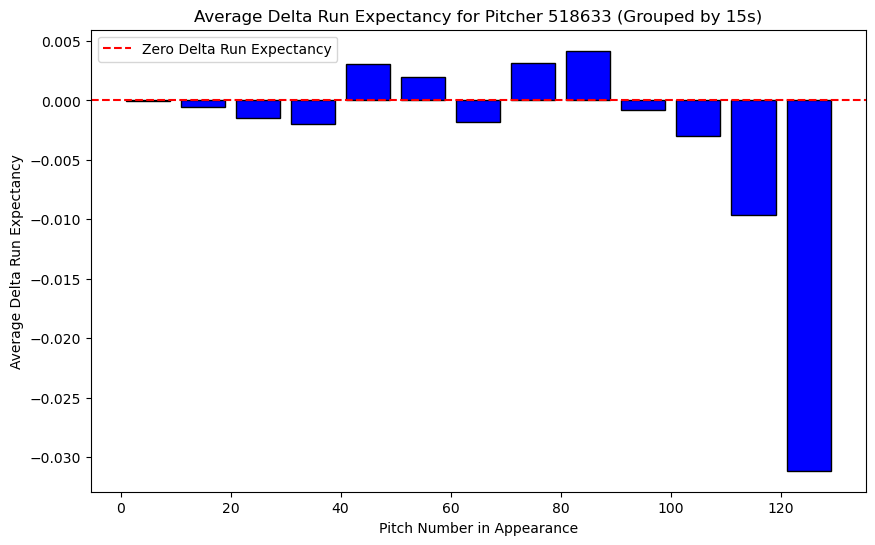

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for rows where 'pitcher' is equal to 518633
filtered_df = OG_savant[OG_savant['pitcher'] > 518633].copy()

# Define the bin edges for 10s
bin_edges = range(0, filtered_df['pitch_number_appearance'].max() + 20, 10)

# Create a new column 'Bin' based on the bin edges
filtered_df['Bin'] = pd.cut(filtered_df['pitch_number_appearance'], bins=bin_edges, right=False)

# Convert interval objects to midpoint values
filtered_df['Bin_Midpoint'] = filtered_df['Bin'].apply(lambda x: x.mid)

# Group by 'Bin_Midpoint' and calculate the mean for each bin
average_by_bin = filtered_df.groupby('Bin_Midpoint', observed=False)['delta_run_exp'].mean().reset_index()

# Plotting the bar graph with averaged values
plt.figure(figsize=(10, 6))
plt.bar(average_by_bin['Bin_Midpoint'], average_by_bin['delta_run_exp'], color='b', edgecolor='black', width=8)  # Adjust width as needed

# Adding a horizontal line at y=0
plt.axhline(0, color='r', linestyle='--', label='Zero Delta Run Expectancy')

# Adding labels and title
plt.title('Average Delta Run Expectancy for Pitcher 518633 (Grouped by 15s)')
plt.xlabel('Pitch Number in Appearance')
plt.ylabel('Average Delta Run Expectancy')

# Adding legend
plt.legend()

# Display the plot
plt.show()
